# Machine Learning and IA Orange Summer Challenge 2024

## Préparation et Exploration des Données

### Importing neccessary libraries

In [1]:
# Importing neccessary libraries

import pandas as pd
import numpy as np
import scipy.stats as sc
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

/home/gilles-tuf/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Loading Dataset

In [2]:
df = pd.read_csv("./data/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Display of descriptive statistics

In [5]:
# Describing Numerical Values
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


D'après la description numérique ci-dessus, les colonnes telles que l'âge, le taux journalier et l'éducation ont une distribution équilibrée des valeurs. Il n'y a pas d'asymétrie significative (valeurs extrêmes ou données très élevées/faibles).


In [6]:
# Finding Outliers with Interquartile Range (IQR)
q1 = df['YearsAtCompany'].quantile(0.25)
q3 = df['YearsAtCompany'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

df[(df['YearsAtCompany'] < lower_bound) | (df['YearsAtCompany'] > upper_bound)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
18,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,23,...,3,80,0,31,3,3,25,8,3,7
28,44,No,Travel_Rarely,477,Research & Development,7,4,Medical,1,36,...,4,80,1,24,4,3,22,6,5,17
45,41,Yes,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,1,58,...,4,80,0,23,0,3,22,15,15,8
62,50,No,Travel_Rarely,989,Research & Development,7,2,Medical,1,80,...,4,80,1,29,2,2,27,3,13,8
63,59,No,Travel_Rarely,1435,Sales,25,3,Life Sciences,1,81,...,4,80,0,28,3,2,21,16,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,39,No,Travel_Rarely,119,Sales,15,4,Marketing,1,1975,...,1,80,0,21,3,3,20,8,11,10
1404,42,No,Non-Travel,335,Research & Development,23,2,Life Sciences,1,1976,...,4,80,0,20,2,3,20,9,3,7
1443,42,No,Travel_Rarely,300,Research & Development,2,3,Life Sciences,1,2031,...,1,80,0,24,2,2,22,6,4,14
1445,41,No,Travel_Rarely,582,Research & Development,28,4,Life Sciences,1,2034,...,3,80,1,21,3,3,20,7,0,10


Toutefois, les colonnes présentant de grandes différences entre la moyenne et la médiane, telles que TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion et YearsWithCurrentManager, présentent des valeurs aberrantes, comme le montre le code ci-dessus.

In [7]:
# Describing Categorical Values
df.describe(include = 'object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


From the categorical description, we can conclude points such as:

Most of the values in Attrition is No, meaning most employees resigned
Most employees are Sales Executives
There are more Male employees compared to Female employees
Most employees are Married

In [8]:
# Check for Null Data
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df.duplicated().sum()
# There are no duplicated values in the dataset

0

In [10]:
df.isna().sum()
# There are no null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

This means the dataset has no null values.

## EDA

### Preparation et prétraitement des données

### Data Cleaning

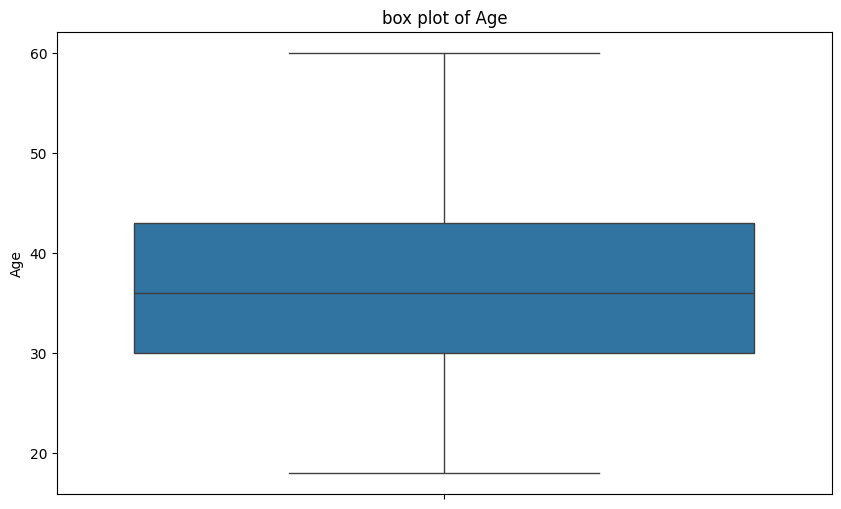

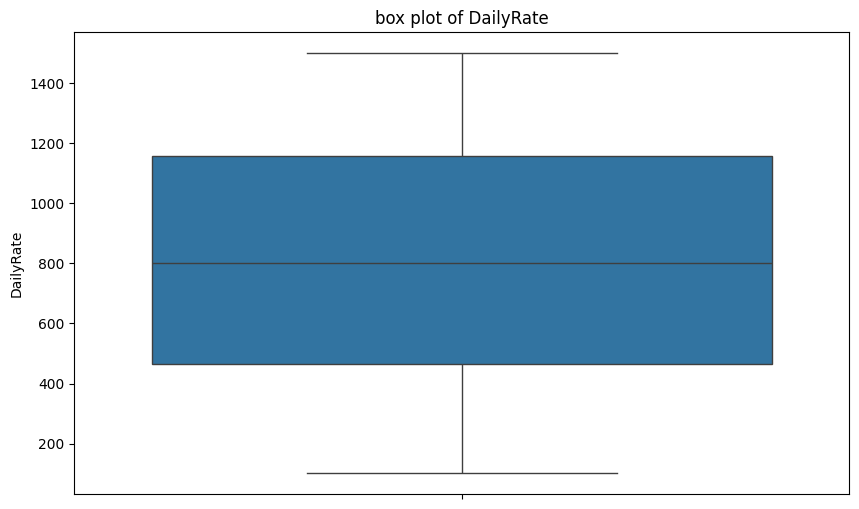

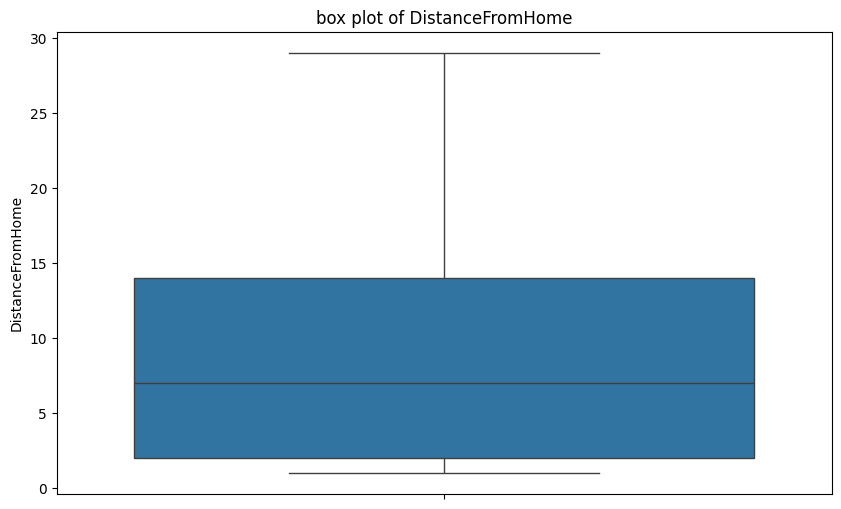

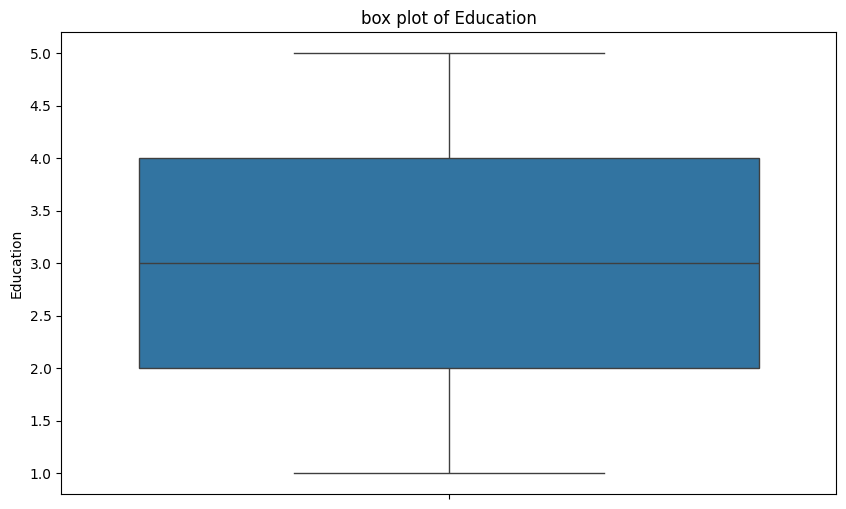

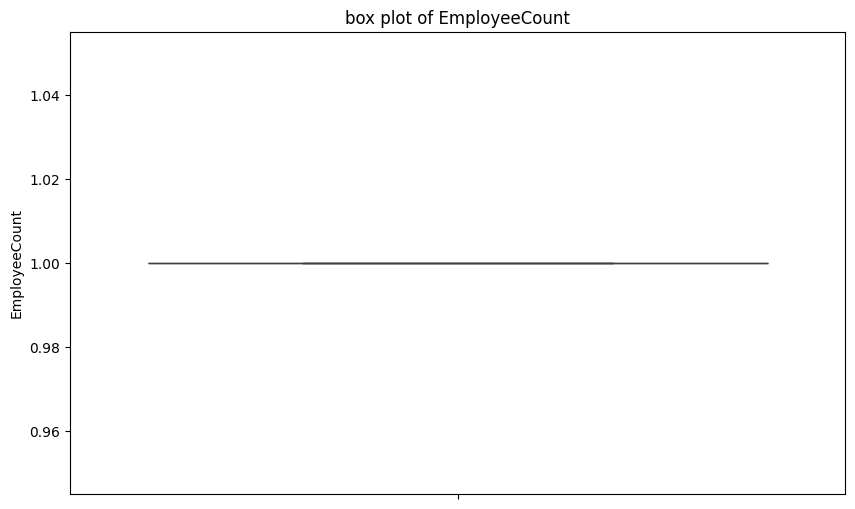

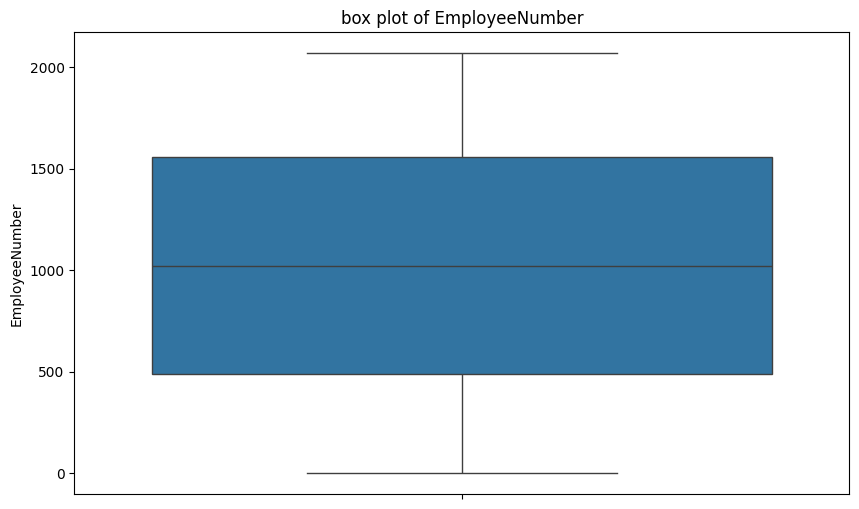

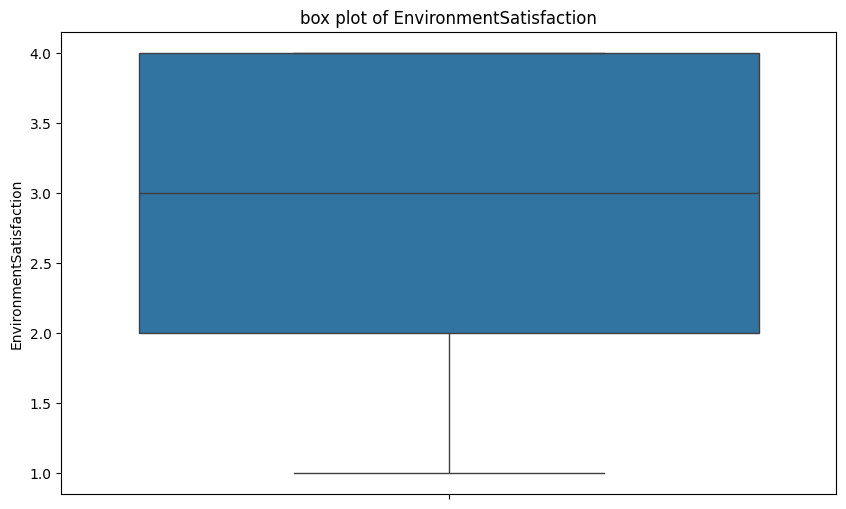

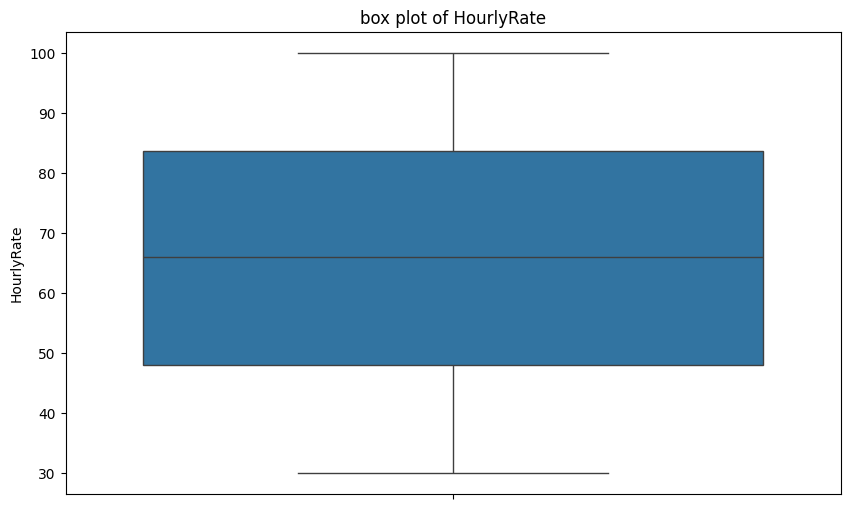

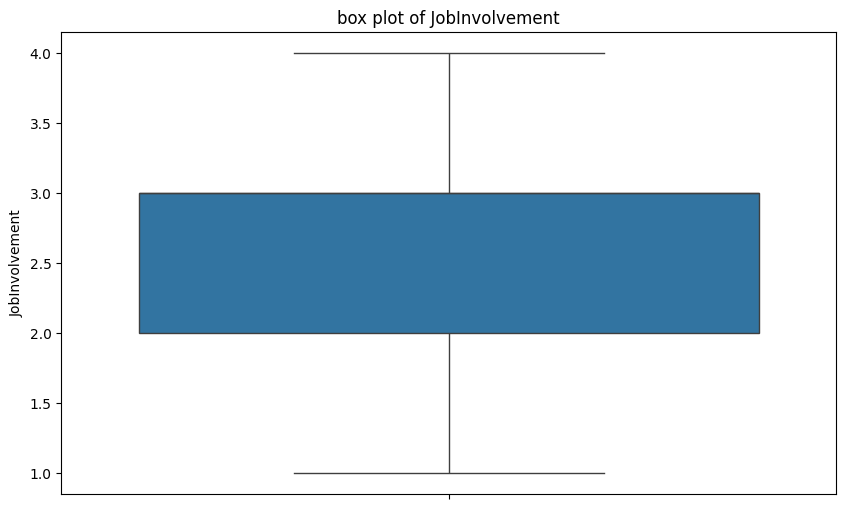

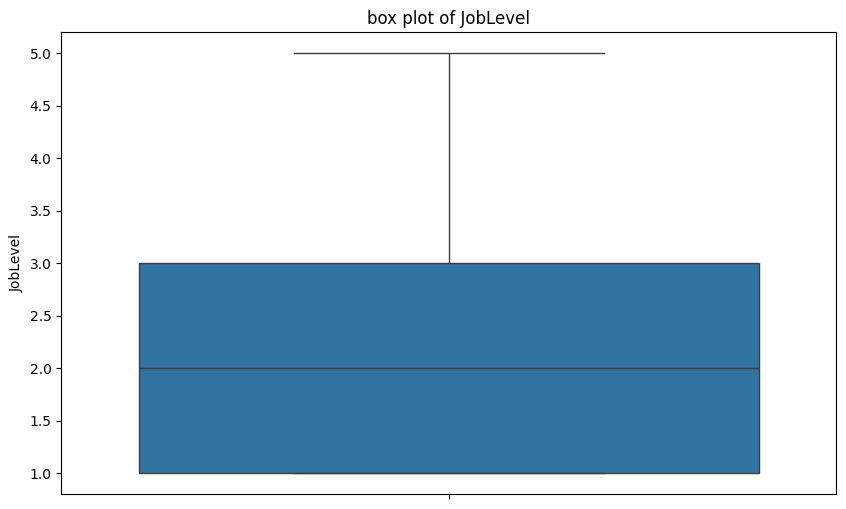

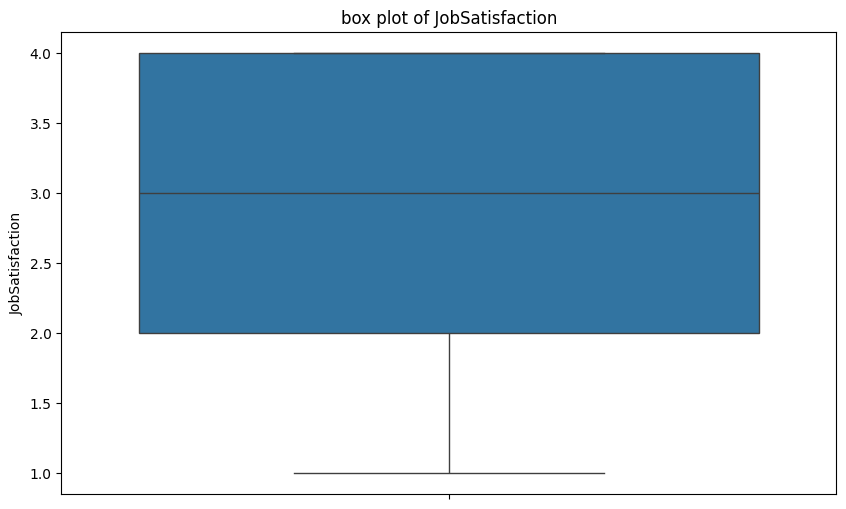

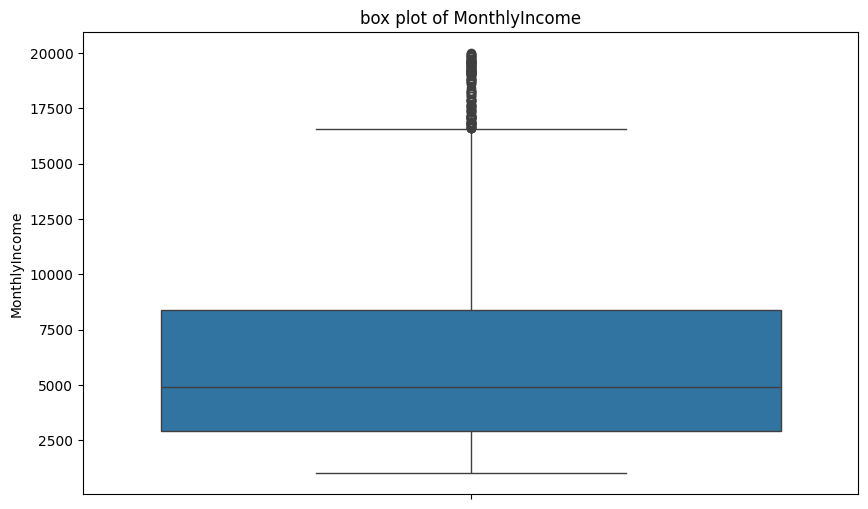

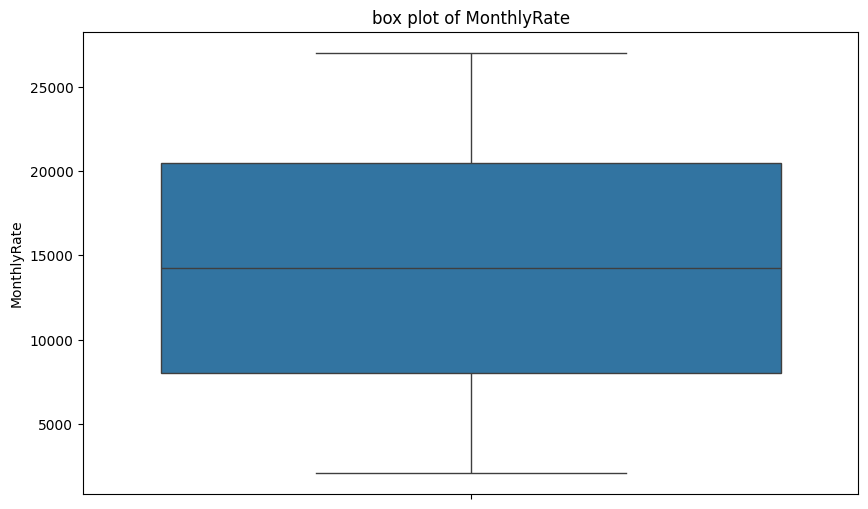

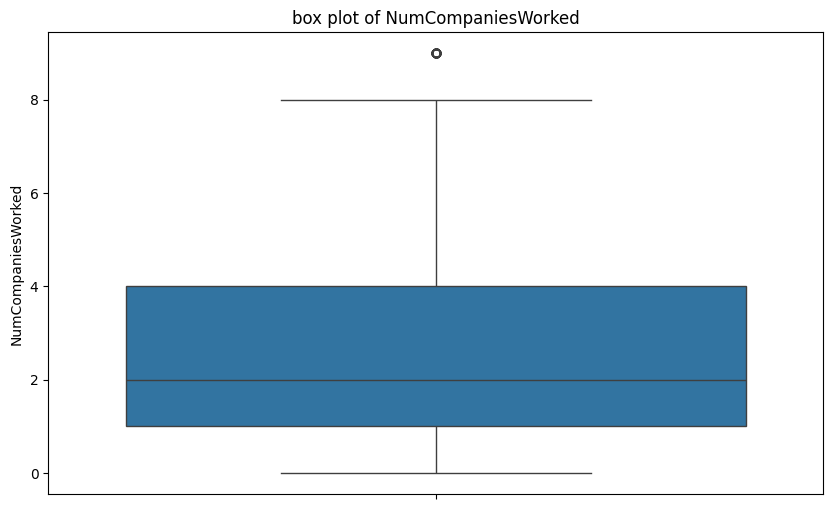

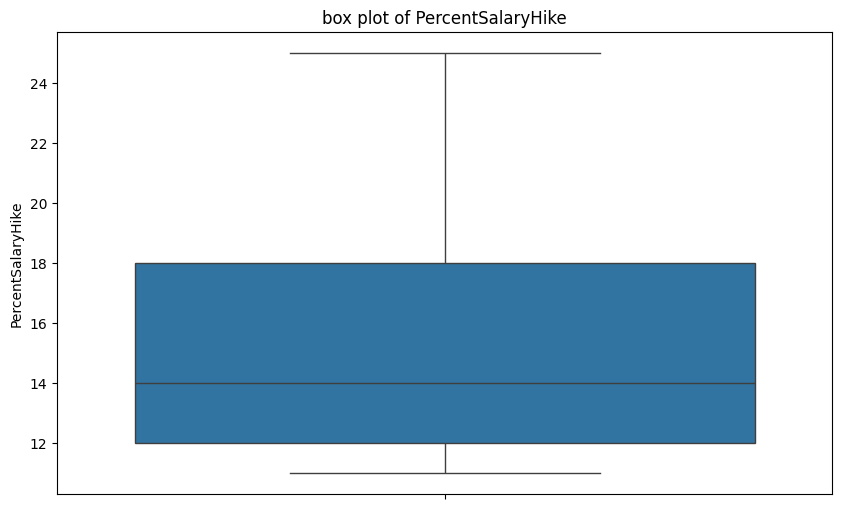

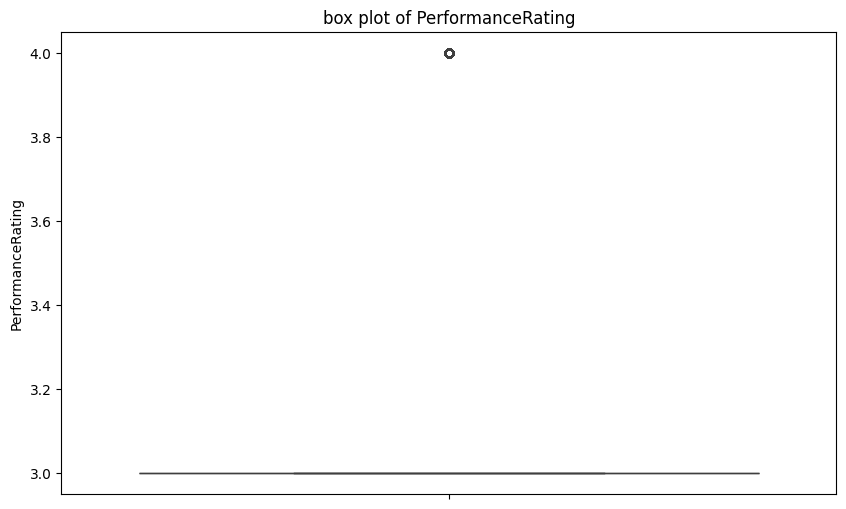

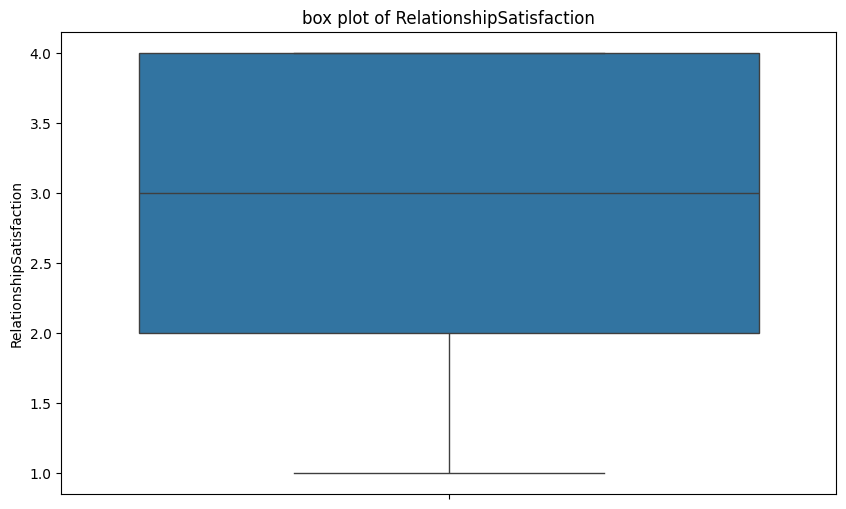

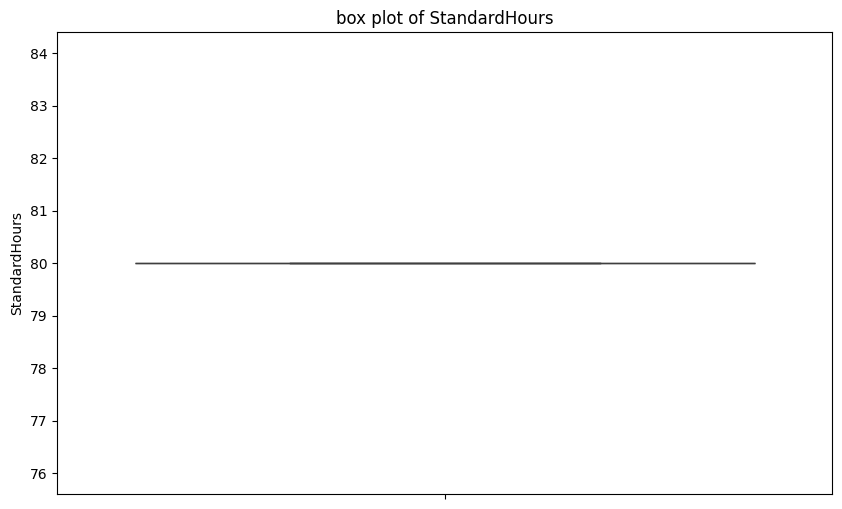

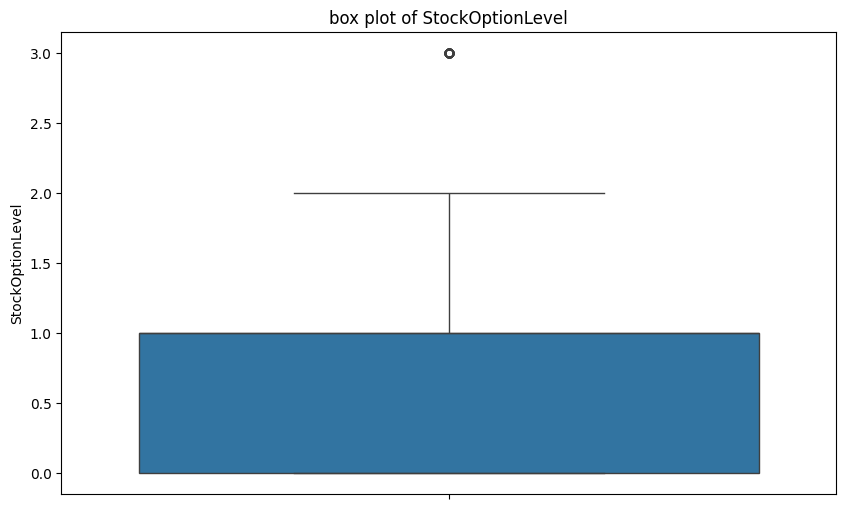

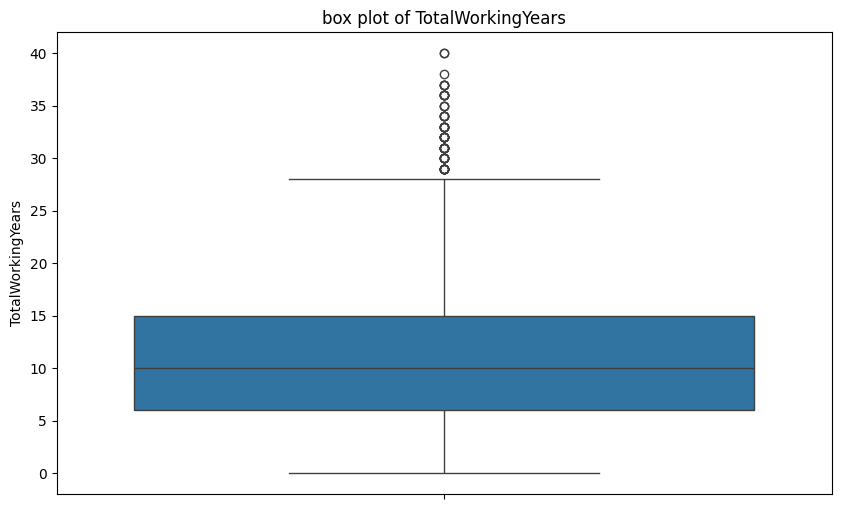

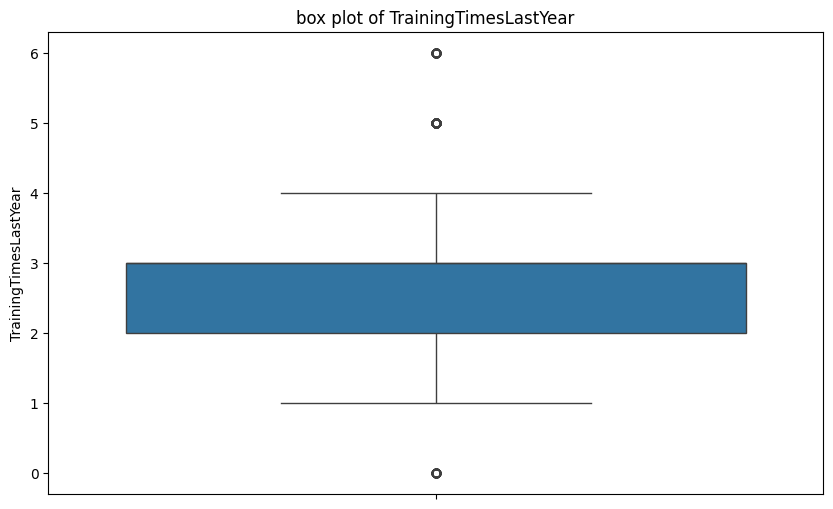

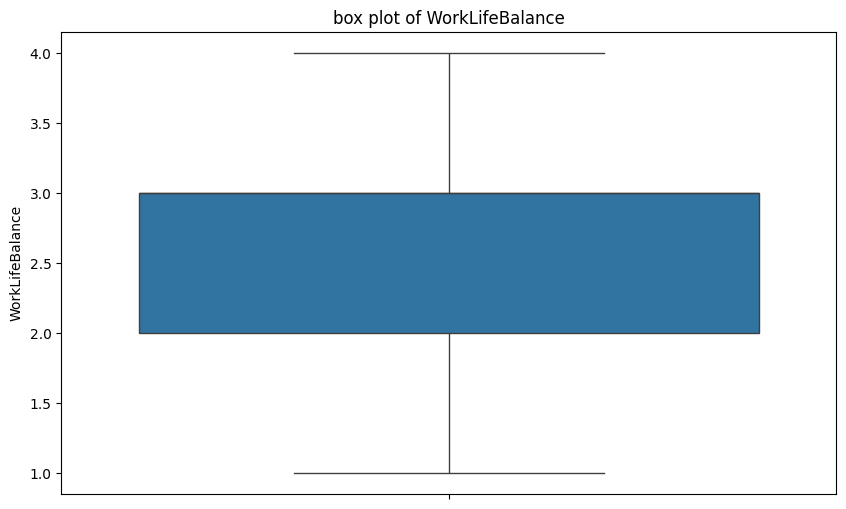

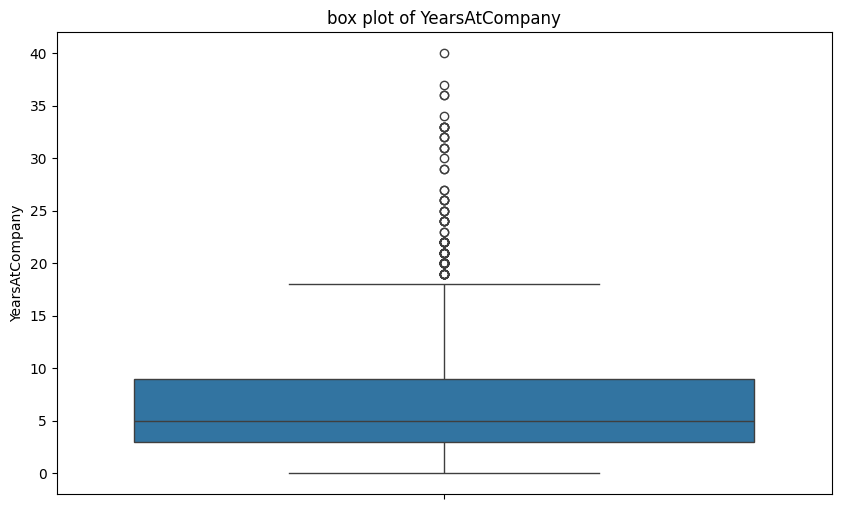

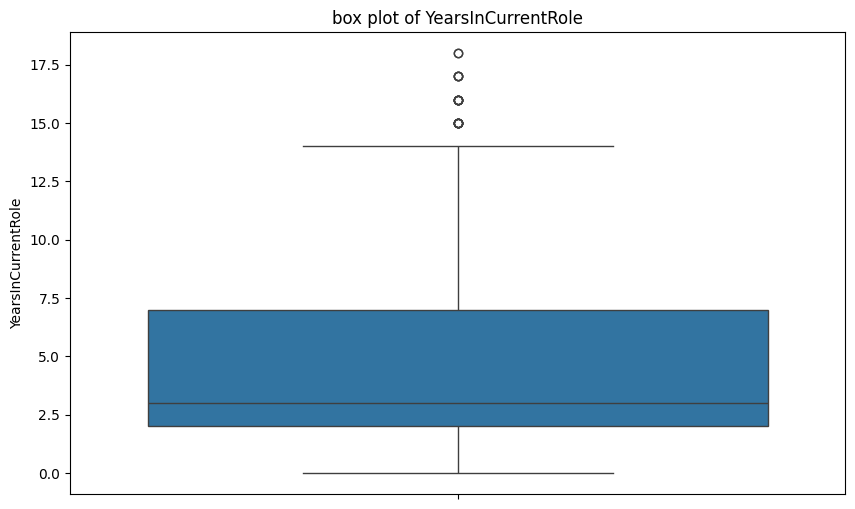

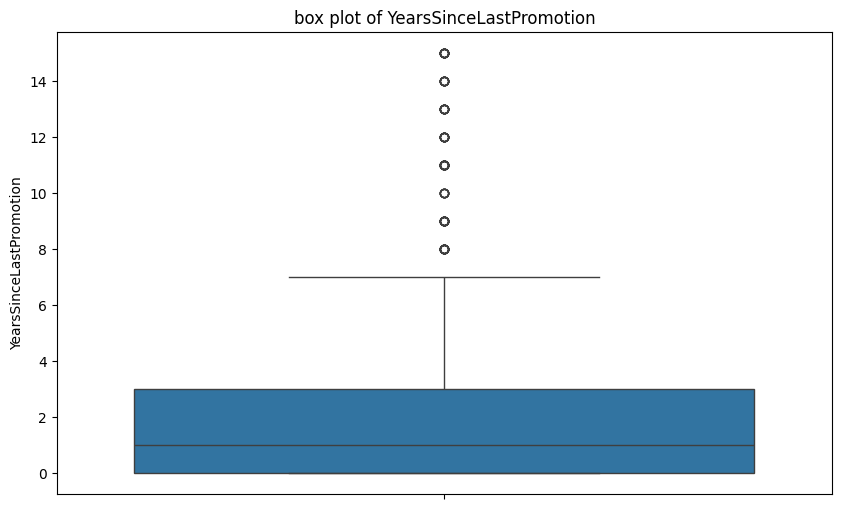

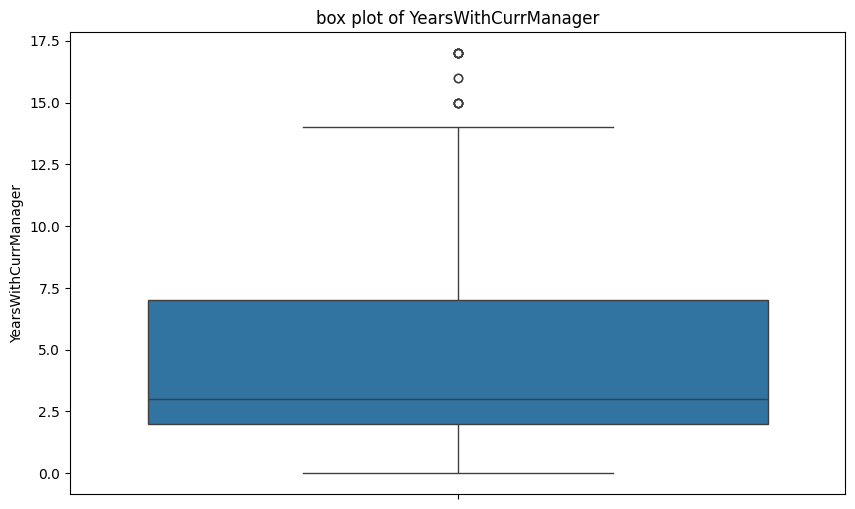

In [11]:
ColsBox = df.select_dtypes('int64')
for col in ColsBox.columns:
    plt.figure(figsize=(10,6))
    plt.title('box plot of '+col)
    sns.boxplot(df[col])
    plt.show()

# Drop Outlier Datas
df.drop(df[(df['TotalWorkingYears'] < lower_bound) | (df['TotalWorkingYears'] > upper_bound)]. index, inplace = True)
df.drop(df[(df['YearsAtCompany'] < lower_bound) | (df['YearsAtCompany'] > upper_bound)]. index, inplace = True)
df.drop(df[(df['YearsInCurrentRole'] < lower_bound) | (df['YearsInCurrentRole'] > upper_bound)]. index, inplace = True)
df.drop(df[(df['YearsSinceLastPromotion'] < lower_bound) | (df['YearsSinceLastPromotion'] > upper_bound)]. index, inplace = True)
df.drop(df[(df['YearsWithCurrManager'] < lower_bound) | (df['YearsWithCurrManager'] > upper_bound)]. index, inplace = True)

Additionally, columns 'EmployeeCount', 'Over18', 'StandardHours' contain only one unique value (all rows have the same values), which will not be useful later on. These columns will also be dropped.

In [12]:
# Drop Data with Only One Unique Value
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

### Data Transformation

In [13]:
# Transforming categorical values into numerical values

mapping = {"Yes": 1, "No": 0}
df["Attrition"] = df["Attrition"].replace(mapping)
df["Attrition"] = df["Attrition"].astype("int64")
df["OverTime"] = df["OverTime"].replace(mapping)
df["OverTime"] = df["OverTime"].astype("int64")

/tmp/ipykernel_40527/2604424203.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Attrition"] = df["Attrition"].replace(mapping)
/tmp/ipykernel_40527/2604424203.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["OverTime"] = df["OverTime"].replace(mapping)


In [14]:
mapping2 = {"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently": 2}
df["BusinessTravel"] = df["BusinessTravel"].replace(mapping2)
df["BusinessTravel"] = df["BusinessTravel"].astype("int64")

/tmp/ipykernel_40527/3907928123.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["BusinessTravel"] = df["BusinessTravel"].replace(mapping2)


In [15]:
mapping3 = {"Research & Development" : 0, "Sales" : 1, "Human Resources" : 2}
df["Department"] = df["Department"].replace(mapping3)
df["Department"] = df["Department"].astype("int64")

/tmp/ipykernel_40527/1223277158.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Department"] = df["Department"].replace(mapping3)


In [16]:
mapping4 = {"Life Sciences": 0, "Medical": 1, "Marketing" : 2,"Technical Degree" : 3, "Human Resources" : 4, "Other" : 5  }
df["EducationField"] = df["EducationField"].replace(mapping4)
df["EducationField"] = df["EducationField"].astype("int64")

/tmp/ipykernel_40527/3782112042.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["EducationField"] = df["EducationField"].replace(mapping4)


In [17]:
mapping5 = {"Male": 1, "Female": 0}
df["Gender"] = df["Gender"].replace(mapping5)
df["Gender"] = df["Gender"].astype("int64")

/tmp/ipykernel_40527/1176857739.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace(mapping5)


In [18]:
mapping6 = {"Human Resources": 8, "Manager": 7,"Healthcare Representative": 6,"Manufacturing Director": 5, "Laboratory Technician" : 4,"Sales Representative": 3, "Sales Executive": 2,"Research Director":1, "Research Scientist": 0}
df["JobRole"] = df["JobRole"].replace(mapping6)
df["JobRole"] = df["JobRole"].astype("int64")

/tmp/ipykernel_40527/50900747.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["JobRole"] = df["JobRole"].replace(mapping6)


In [19]:
mapping7 = {"Divorced": 2,"Married": 1, "Single": 0}
df["MaritalStatus"] = df["MaritalStatus"].replace(mapping7)
df["MaritalStatus"] = df["MaritalStatus"].astype("int64")

/tmp/ipykernel_40527/1491458521.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["MaritalStatus"] = df["MaritalStatus"].replace(mapping7)


In [20]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,0,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,0,8,1,0,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,0,2,2,5,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,0,3,4,0,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,0,2,1,1,1,1,...,3,4,1,6,3,3,2,2,2,2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1211 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1211 non-null   int64
 1   Attrition                 1211 non-null   int64
 2   BusinessTravel            1211 non-null   int64
 3   DailyRate                 1211 non-null   int64
 4   Department                1211 non-null   int64
 5   DistanceFromHome          1211 non-null   int64
 6   Education                 1211 non-null   int64
 7   EducationField            1211 non-null   int64
 8   EnvironmentSatisfaction   1211 non-null   int64
 9   Gender                    1211 non-null   int64
 10  HourlyRate                1211 non-null   int64
 11  JobInvolvement            1211 non-null   int64
 12  JobLevel                  1211 non-null   int64
 13  JobRole                   1211 non-null   int64
 14  JobSatisfaction           1211 non-null   int

### Data Visualization

Which columns have the top 5 highest correlations with each other?
What factor influences employee's rate of attrition the most?

In [22]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.142341,-0.030178,0.003049,0.005750,0.001448,0.221773,-0.030495,-0.007762,-0.007856,...,0.000593,0.021190,0.071545,0.475104,-0.003040,-0.024640,0.140990,0.116568,0.106549,0.113680
Attrition,-0.142341,1.000000,0.141150,-0.058909,0.072696,0.085188,-0.028060,0.056687,-0.110085,0.022948,...,0.012006,-0.059757,-0.155079,-0.191077,-0.055120,-0.066418,-0.179391,-0.175973,-0.022600,-0.160215
BusinessTravel,-0.030178,0.141150,1.000000,-0.030995,0.018113,-0.041714,-0.028722,0.009350,-0.012603,-0.037841,...,0.002087,0.026117,-0.037695,-0.017851,0.013461,0.014956,-0.016416,-0.022961,-0.005965,-0.029608
DailyRate,0.003049,-0.058909,-0.030995,1.000000,-0.012364,-0.010700,-0.022480,-0.008024,0.046935,-0.001651,...,-0.003863,0.007495,0.054690,0.026731,0.010797,-0.037915,0.004765,0.019979,-0.008320,-0.007320
Department,0.005750,0.072696,0.018113,-0.012364,1.000000,-0.005781,0.020169,0.183907,-0.029593,0.001572,...,-0.031256,0.020643,-0.019041,-0.009253,0.000290,0.077329,0.017080,0.021612,-0.004445,-0.007697
DistanceFromHome,0.001448,0.085188,-0.041714,-0.010700,-0.005781,1.000000,0.009952,-0.001833,-0.031538,0.021208,...,0.032324,0.012005,0.072614,0.039214,-0.035635,-0.045759,0.020485,0.018480,0.032552,0.011539
Education,0.221773,-0.028060,-0.028722,-0.022480,0.020169,0.009952,1.000000,0.030218,-0.038097,-0.009522,...,-0.053352,0.000935,0.025618,0.183461,-0.022897,0.009836,0.083621,0.076701,0.082353,0.053653
EducationField,-0.030495,0.056687,0.009350,-0.008024,0.183907,-0.001833,0.030218,1.000000,0.069665,0.039025,...,-0.033294,-0.004183,-0.028527,-0.021571,0.001040,0.038846,-0.013494,0.008567,-0.012424,0.009099
EnvironmentSatisfaction,-0.007762,-0.110085,-0.012603,0.046935,-0.029593,-0.031538,-0.038097,0.069665,1.000000,0.000223,...,-0.021491,0.012523,0.010731,-0.039458,-0.028240,0.020959,0.006295,0.028195,0.021813,-0.002899
Gender,-0.007856,0.022948,-0.037841,-0.001651,0.001572,0.021208,-0.009522,0.039025,0.000223,1.000000,...,-0.008915,0.041808,0.031540,-0.028025,-0.039541,-0.018578,-0.033305,-0.017159,-0.046831,-0.018768


<Axes: >

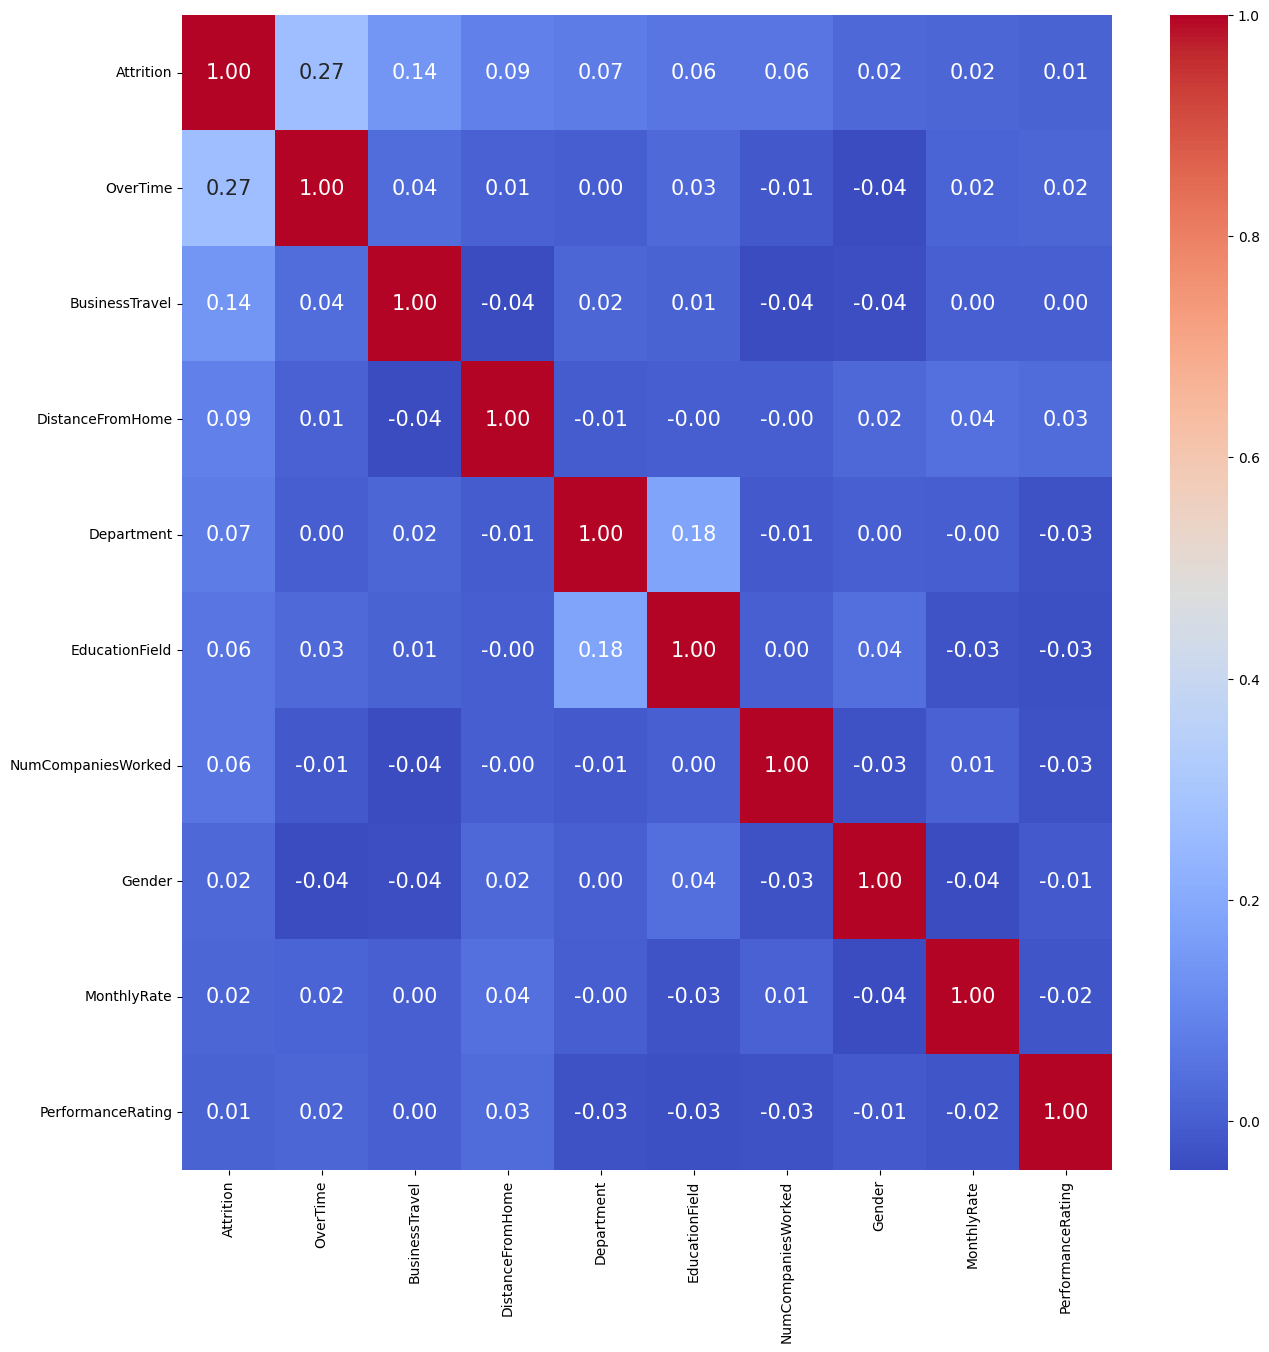

In [23]:
# Correlations Matrix in Regards to Attrition

# Selects 10 columns that has the highest correlation to Attrition
col = df.corr().nlargest(10, "Attrition").Attrition.index

plt.figure(figsize=(15, 15))
sns.heatmap(df[col].corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size":15})

<Axes: >

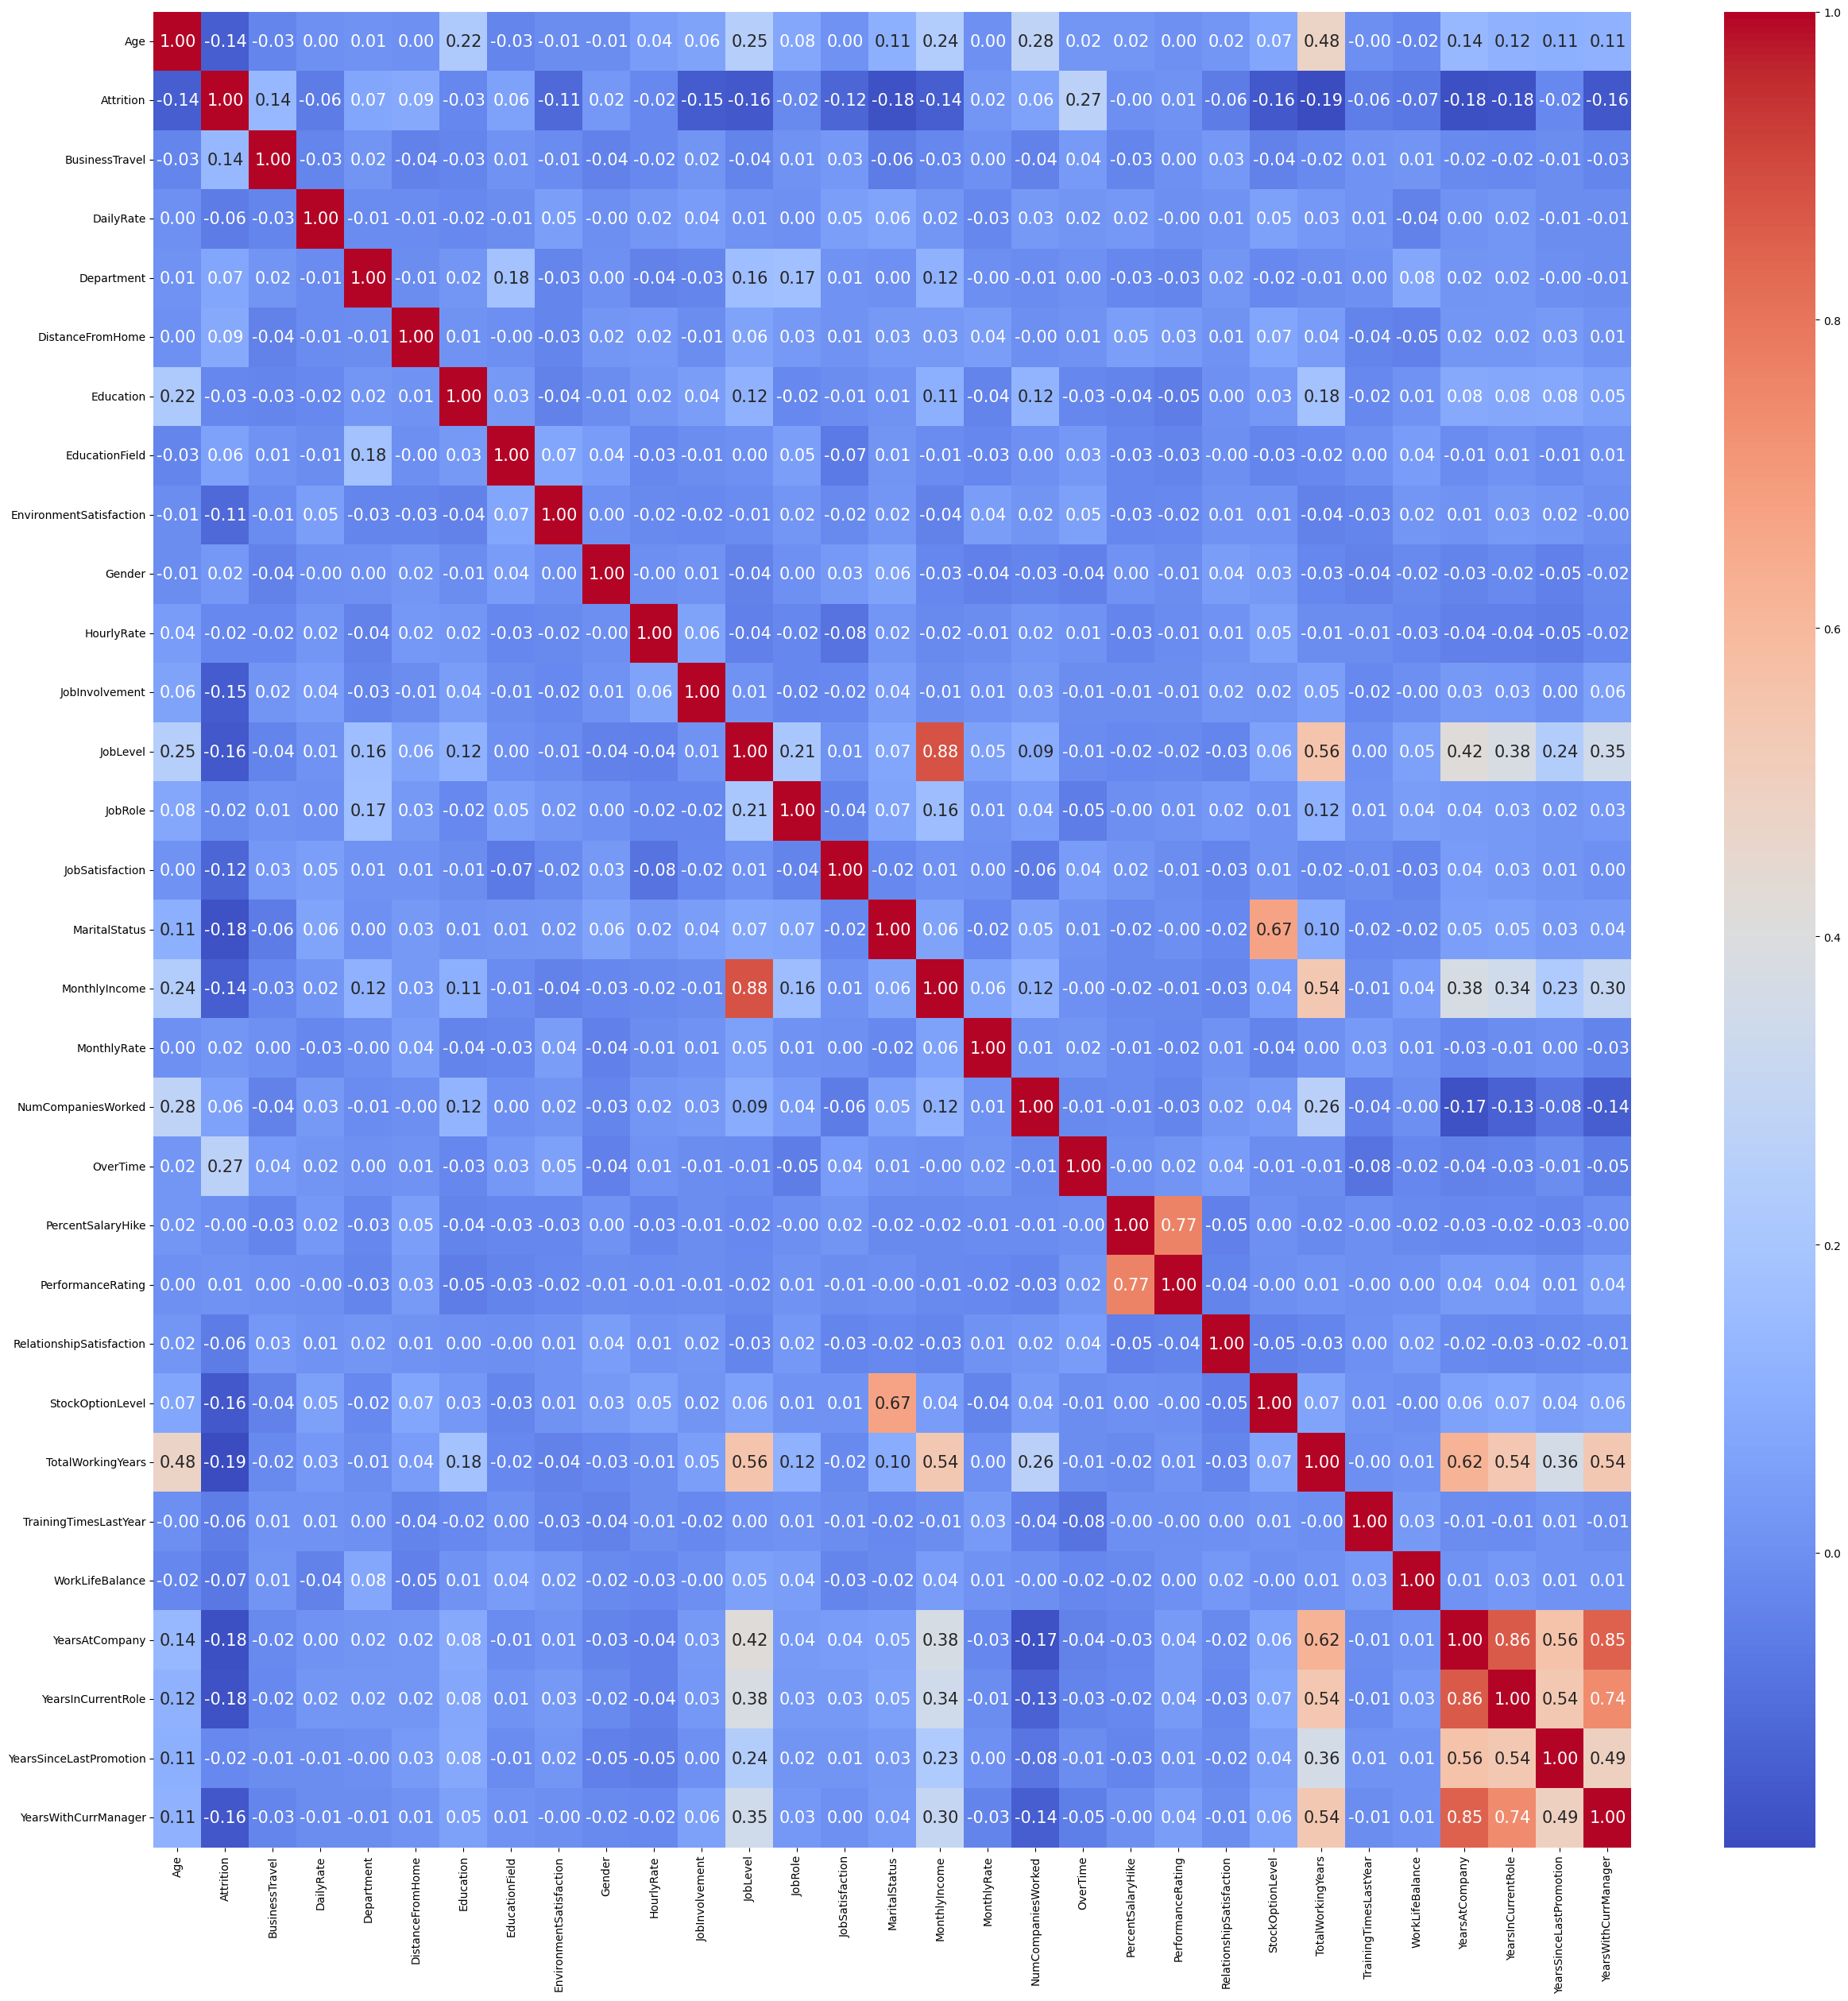

In [24]:
# Correlation Matrix (all columns)
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size":15})

Top 5 Highest Correlations

- JobLevel affects MonthlyIncome (0.88)
- YearsInCurrentRole affects YearsAtCompany (0.86)
- YearsAtCompany affects YearsWithCurrManager (0.85)
- PerformanceRating affects PercentSalaryHike (0.77)
- YearsInCurrentRole affects YearsWithCurrentManager (0.74)

## Attrition predictions

To predict Attrition we should use a classification model, because this is a binary variable.

1. LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, recall_score, precision_recall_curve

In [26]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Attrition', axis=1), df['Attrition'], test_size=0.2, random_state=33)

# Using solver='lbfgs' option to implement regularization
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(x_train, y_train)

# Checking the score
logreg.score(x_test, y_test)

0.8847736625514403

A confusion matrix is used to evaluate the performance of a classification model. It operates such metrics of predictions as:

- True Positive (TP): Correct positive prediction
- False Positive (FP): Incorrect positive prediction, real label is negative
- False Negative (FN): Incorrect negative prediction, real label is positive
- True Negative (TN): Correct negative prediction

It looks like this:



In [27]:

# Let's build a confusion matrix

y_pred = logreg.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1:", f1)

Confusion Matrix:
[[201   0]
 [ 28  14]]
Precision: 1.0
Recall: 0.3333333333333333
F1: 0.5


2. LogisticRegressionCV

This model is a subclass of LogisticRegression, but includes cross-validation.



In [28]:
from sklearn.linear_model import LogisticRegressionCV

In [29]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Attrition', axis=1), df['Attrition'], test_size=0.2, random_state=33)

logreg = LogisticRegressionCV(max_iter=10000)
logreg.fit(x_train, y_train)

# Checking the score
logreg.score(x_train, y_train)

0.8357438016528925

Confusion matrix

In [30]:
y_pred = logreg.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1:", f1)

Confusion Matrix:
[[201   0]
 [ 37   5]]
Precision: 1.0
Recall: 0.11904761904761904
F1: 0.21276595744680848


3. KNeighborsClassifier¶

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Attrition', axis=1), df['Attrition'], test_size=0.2, random_state=33)

# Create a KNN model and fit it to the training data
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# Checking the score on the training set
knn.score(x_test, y_test)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [35]:
y_pred = knn.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1:", f1)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

4. Conclusions

So, the third model doesn't seem relevant due to results.
And the 2-nd model is a bit better then the 1st one. It means that cross-validation is a good option to use as often as it is possible by the task.
KNN-model showed slightly worse results, especially on precision, recall and f1-score.

Let's use the 2-nd model for further calculations

In [36]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Attrition', axis=1), df['Attrition'], test_size=0.2, random_state=33)

logreg = LogisticRegressionCV(max_iter=10000)
logreg.fit(x_train, y_train)

# Checking the score
logreg.score(x_train, y_train)

0.8357438016528925

Now let's calculate thresholds that maximize recall and f1-score:

In [37]:
# First, we predict the probabilities to obtain 1 or 0
# It gives us two arrays, we can take one of them
y_pred_prob = logreg.predict_proba(x_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Calculate F1 score at each threshold
f1_scores = []
for i in range(len(thresholds)):
    score = 2 * precision[i] * recall[i] / (precision[i] + recall[i])
    f1_scores.append(score)

# Find the threshold that maximizes recall and f1-score
max_recall = thresholds[np.argmax(recall)]
max_f1_score = thresholds[np.argmax(f1_scores)]

print("Threshold that maximizes recall:", max_recall)
print("Threshold that maximizes F1 score:", max_f1_score)

Threshold that maximizes recall: 0.008543738641794286
Threshold that maximizes F1 score: 0.21004540987735534


Let's make a dataframe containing all these values of our model:

In [38]:
# First we zip our data
data = zip(precision, recall, thresholds)

# And then concatenate to a new dataframe
model_scores = pd.DataFrame(data, columns=['Precision', 'Recall', 'Thresholds'])
model_scores

,Precision,Recall,Thresholds
0,0.172840,1.000000,0.008544
1,0.173554,1.000000,0.010607
2,0.174274,1.000000,0.012175
3,0.175000,1.000000,0.014697
4,0.175732,1.000000,0.015701
...,...,...,...
238,1.000000,0.119048,0.504161
239,1.000000,0.095238,0.560426
240,1.000000,0.071429,0.565143
241,1.000000,0.047619,0.595787


Let's look at our precision-recall plot:

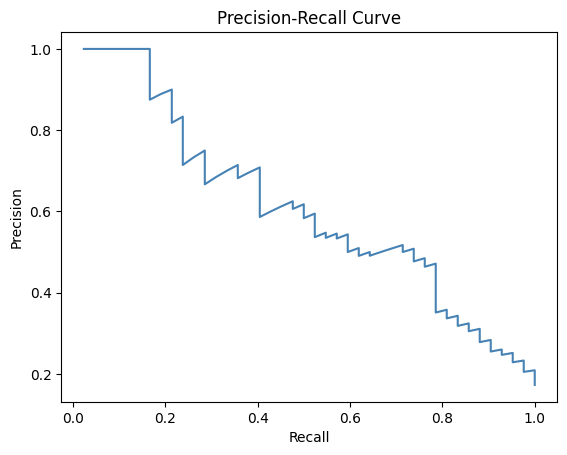

In [39]:
plt.plot(model_scores['Recall'], model_scores['Precision'], color='steelblue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [40]:
# We can find index in our dataframe for max recall
print('index of max precision: ', model_scores['Precision'].idxmax())
# Or that way
print('index of max precision: ', np.argmax(precision))
# And its value:
print('Threshold of max precision: ', model_scores['Thresholds'][np.argmax(precision)])

index of max precision:  236
index of max precision:  236
Threshold of max precision:  0.4451348422521702


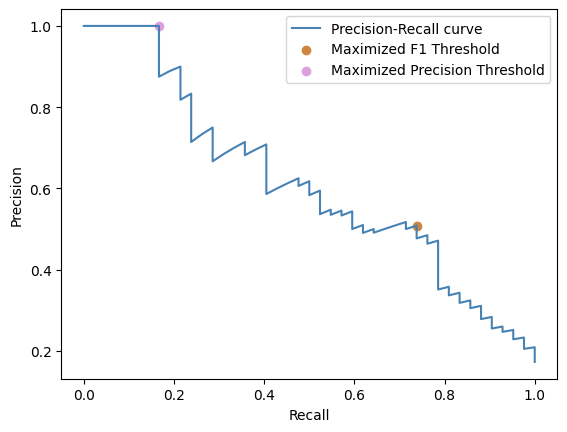

In [41]:
plt.plot(recall, precision, color='steelblue', label='Precision-Recall curve')
plt.scatter(recall[np.argmax(f1_scores)], 
            precision[np.argmax(f1_scores)], 
            color='peru', 
            label='Maximized F1 Threshold')
plt.scatter(recall[np.argmax(precision)], 
            precision[np.argmax(precision)],
            color='plum', 
            label='Maximized Precision Threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()